In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.fft import fft,fftfreq
import os

files = os.listdir("Data/")

def get_fft(input_waveform,sample_rate = 100,smoothing=5):
    # SUMMARY: Computes 1-D Fast Fourier Transform on a sequence of data.
    # RETURNS: tuple (x-values are Frequency in Hz, y-values are Amplitude)
    # LIMITATIONS: Max frequency value is 1/2 of time interval. Utilize last 4 time intervals for more accurate fourier transform on higher frequencies.
    flat = input_waveform.flatten()
    yf = fft(flat)
    xf = fftfreq(len(flat),100/len(flat))[:len(flat)//2]
    yval = 2.0/len(flat)*np.abs(yf[:len(flat)//2])
    s = pd.Series(yval)
    y = s.rolling(smoothing)
    avg = y.mean()
    #sns.lineplot(x=xf,y=avg,linewidth=0.5) # plot waveform
    return (xf,avg)

def load_data(filename):
    data = np.load(f"Data/{filename}")
    data = data.reshape((data.shape[1],data.shape[0],data.shape[2]))
    return data

# Exploration 1 - Waveform Shapes

In [29]:
data = load_data(files[0])
data.shape
labels = np.load(files[1])

Text(0.5, 0.98, 'Waveform Examples - Patient 1, Night 1, Epoch 1200')

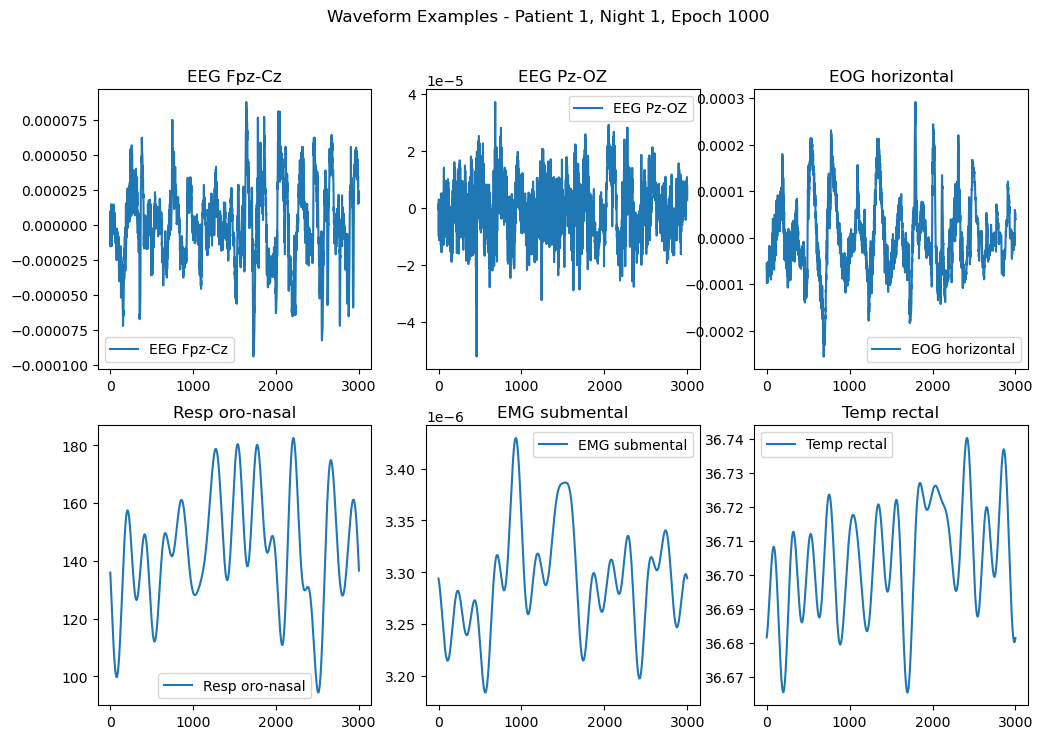

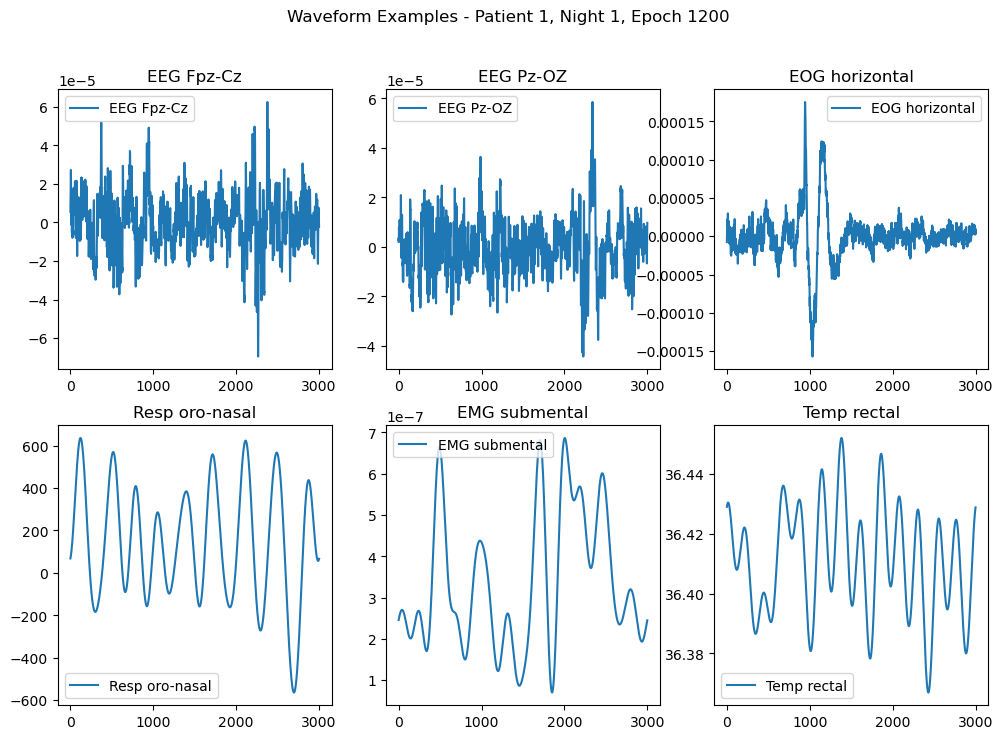

In [30]:
channel_labels_strings = ["EEG Fpz-Cz","EEG Pz-OZ", "EOG horizontal", "Resp oro-nasal", "EMG submental", "Temp rectal"]

def plot_waves(data):
    fig, ax = plt.subplots(2,3)
    ax = ax.flatten()
    fig.set_size_inches(12,8)

    # plot each waveform separately
    for i in range(0,6):
        ax[i].set_title(channel_labels_strings[i])
        sns.lineplot(data[i,:],label=channel_labels_strings[i],ax=ax[i])

plot_waves(data[:,1000,:])
plt.suptitle("Waveform Examples - Patient 1, Night 1, Epoch 1000")

plot_waves(data[:,1200,:])
plt.suptitle("Waveform Examples - Patient 1, Night 1, Epoch 1200")

Text(0.5, 0.98, 'Waveform Examples - Patient 1, Night 1, Epoch 1200')

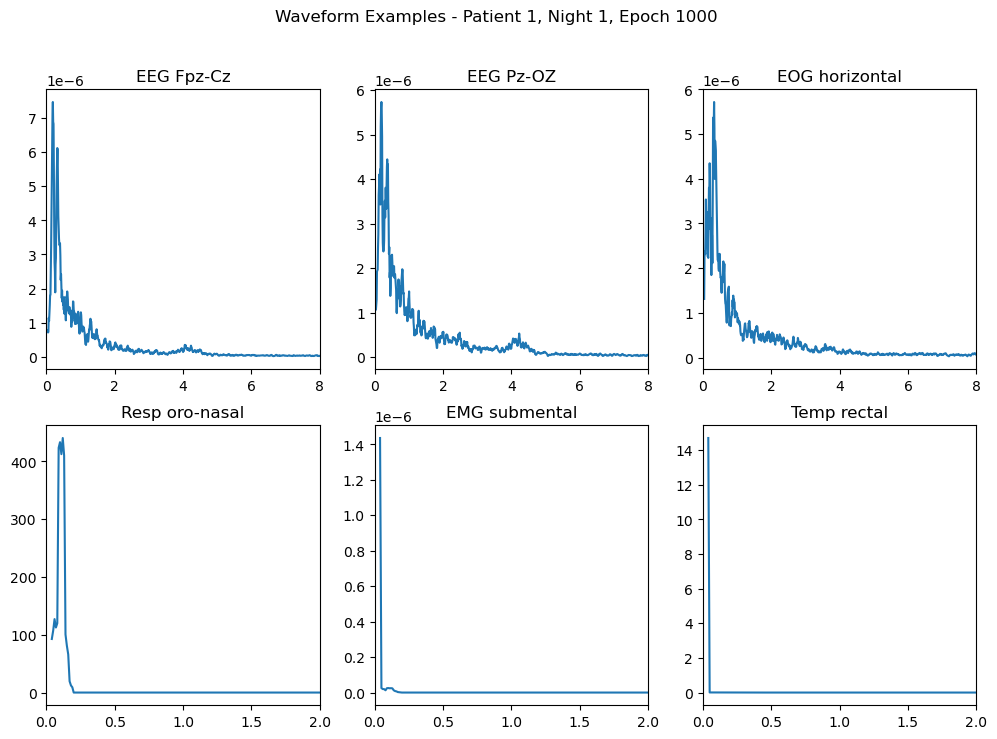

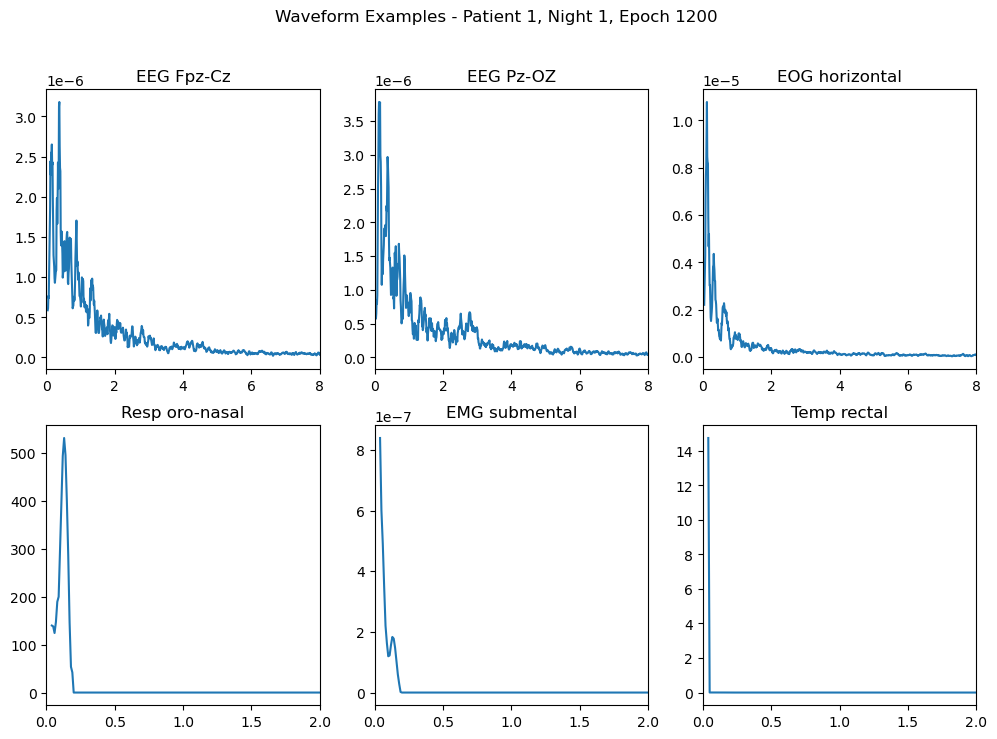

In [73]:
def plot_waves_fft(data):
    fig, ax = plt.subplots(2,3)
    ax = ax.flatten()
    fig.set_size_inches(12,8)

    # plot each waveform separately
    for i in range(0,6):
        ax[i].set_title(channel_labels_strings[i])
        x, y = get_fft(data[i,:])
        if(i>2):
            ax[i].set_xlim(0,2)
        else:
            ax[i].set_xlim(0,8)
        ax[i].plot(x,y)
        #(x=x,y=y,ax=ax[i])

plot_waves_fft(data[:,1000,:])
plt.suptitle("Waveform Examples - Patient 1, Night 1, Epoch 1000")

plot_waves_fft(data[:,1200,:])
plt.suptitle("Waveform Examples - Patient 1, Night 1, Epoch 1200")

Text(0.5, 0.98, 'Waveform Examples - Patient 1, Night 1, Epoch 1200')

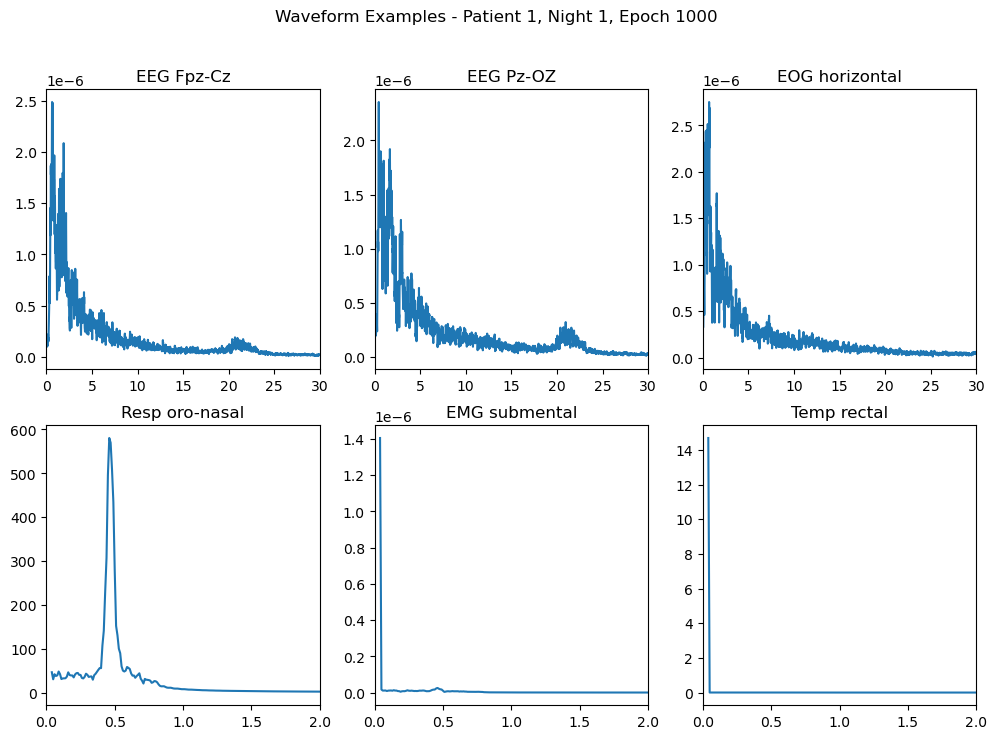

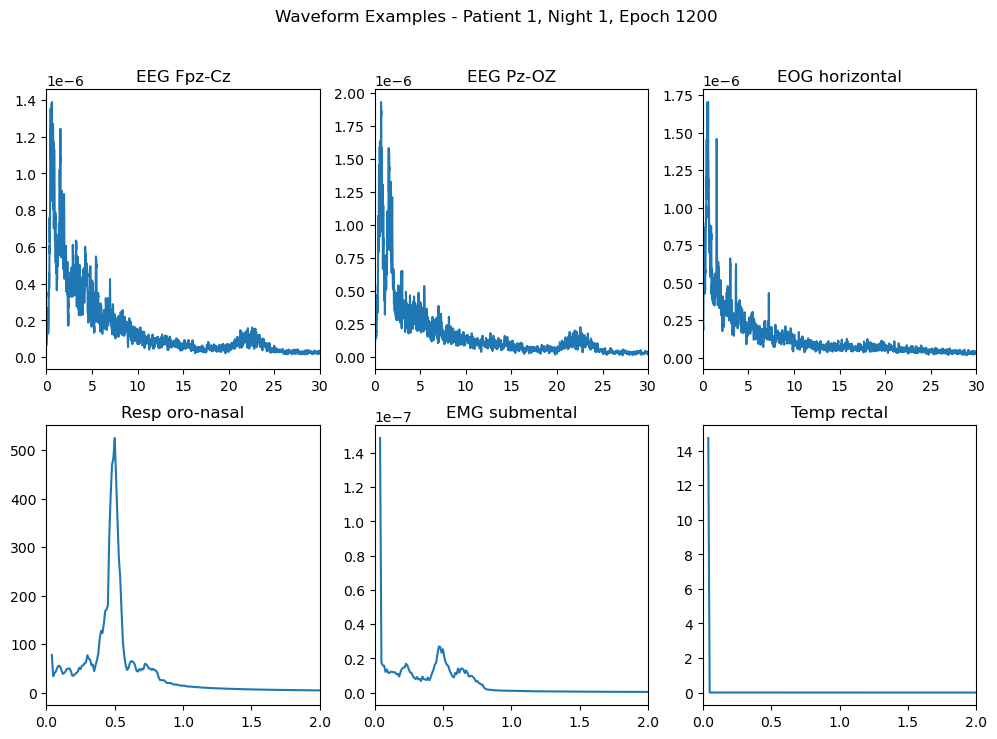

In [75]:
def plot_waves_fft(data,epoch,backward,labels):
    data = data[:,(epoch-backward):epoch,:]

    fig, ax = plt.subplots(2,3)
    ax = ax.flatten()
    fig.set_size_inches(12,8)

    # plot each waveform separately
    for i in range(0,6):
        ax[i].set_title(channel_labels_strings[i])
        x, y = get_fft(data[i,:,:])
        sns.lineplot(x=x,y=y,ax=ax[i])
        if(i>2):
            ax[i].set_xlim(0,2)
        else:
            ax[i].set_xlim(0,30)

plot_waves_fft(data,1000,5,labels)
plt.suptitle("Waveform Examples - Patient 1, Night 1, Epoch 1000")

plot_waves_fft(data,1200,5,labels)
plt.suptitle("Waveform Examples - Patient 1, Night 1, Epoch 1200")

In [119]:
representatives = [np.min(np.arange(len(labels))[labels==i]) for i in range(1,7)]
#print(representatives)

representatives[0] = 20

for i in range(0,len(representatives)):
    plot_waves_fft(data,representatives[i],10,labels)
    plt.suptitle(f"Waveform Examples - Patient 1, Night 1, Epoch {representatives[i]}, Sleep State: {i}")

C:\Users\sanja\AppData\Local\Temp\ipykernel_66608\838408519.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  representatives = [np.min(np.arange(len(labels))[labels==i]) for i in range(1,7)]


ValueError: zero-size array to reduction operation minimum which has no identity

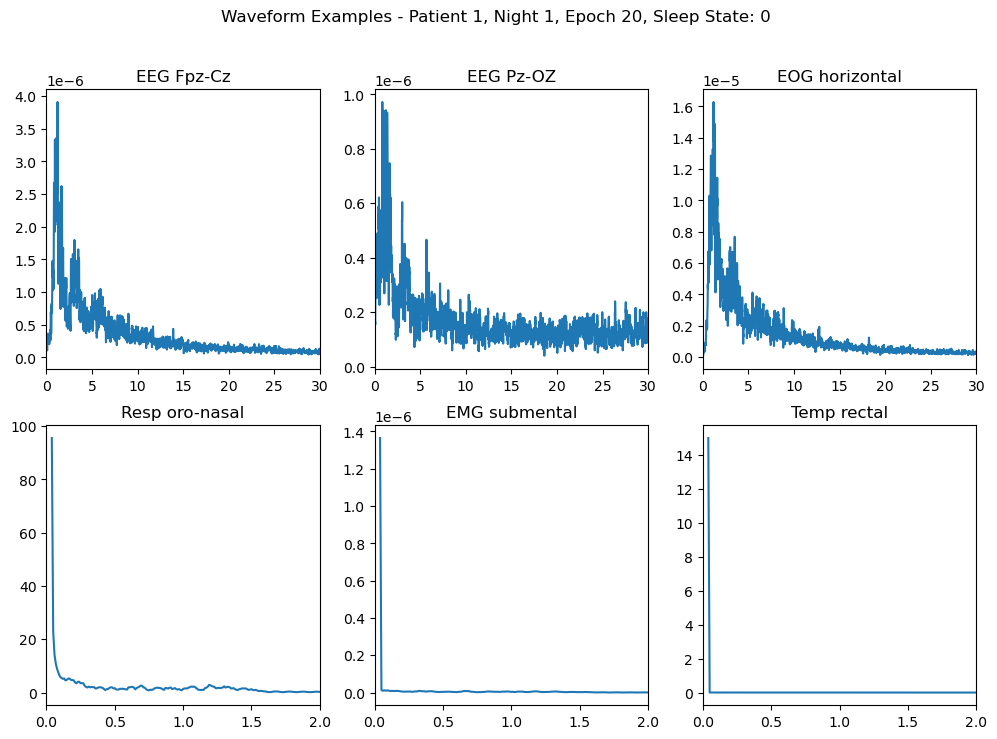

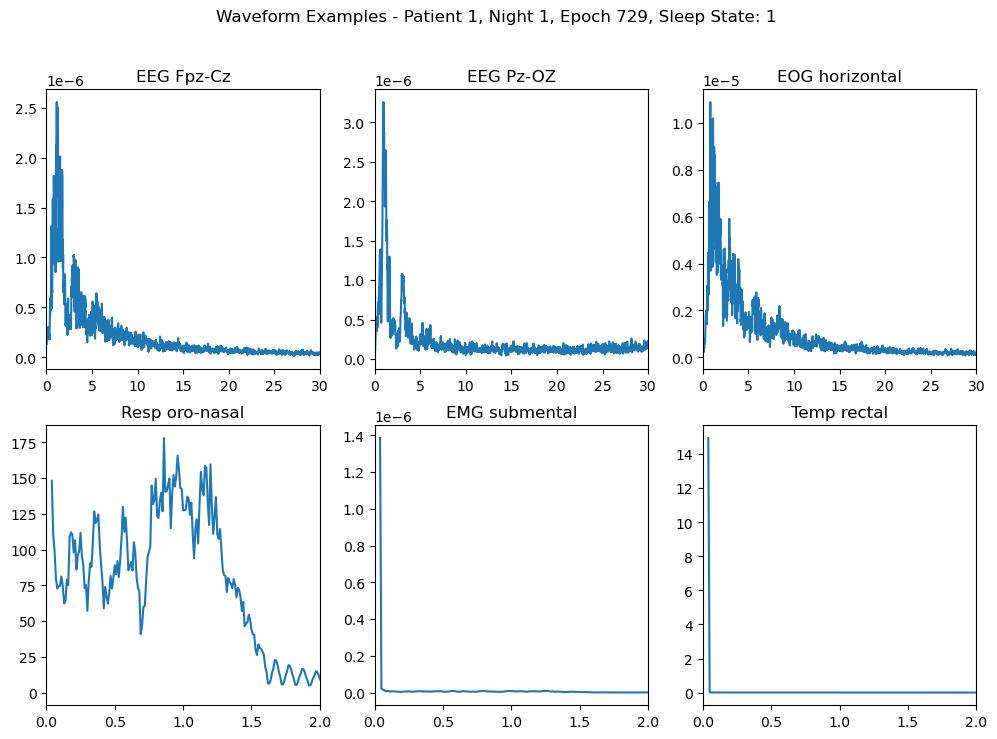

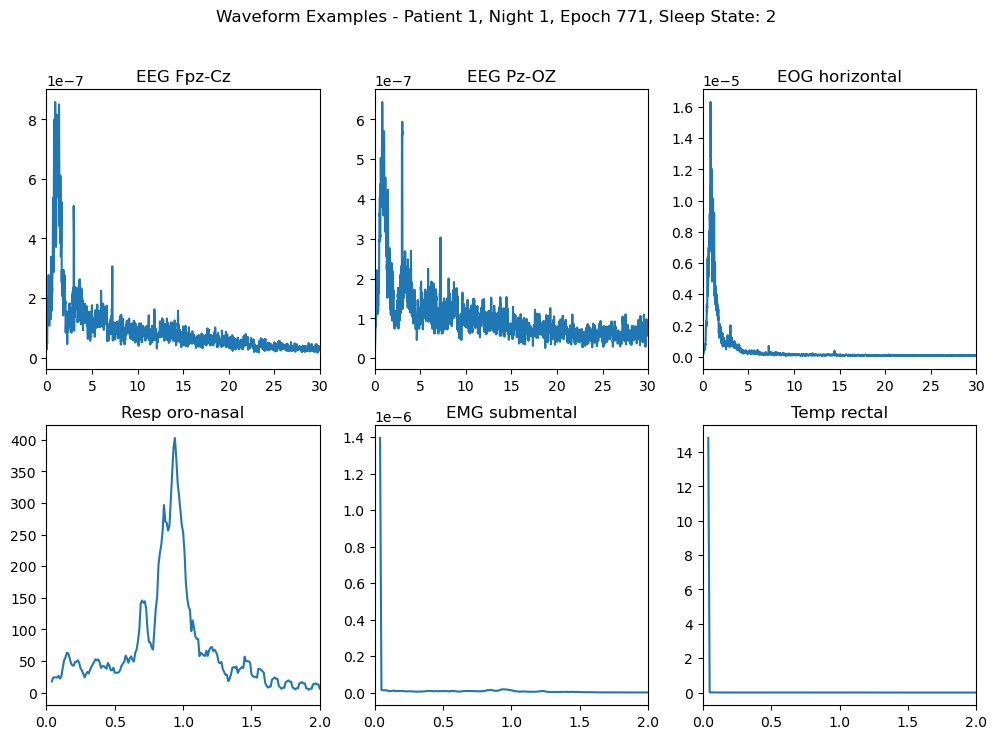

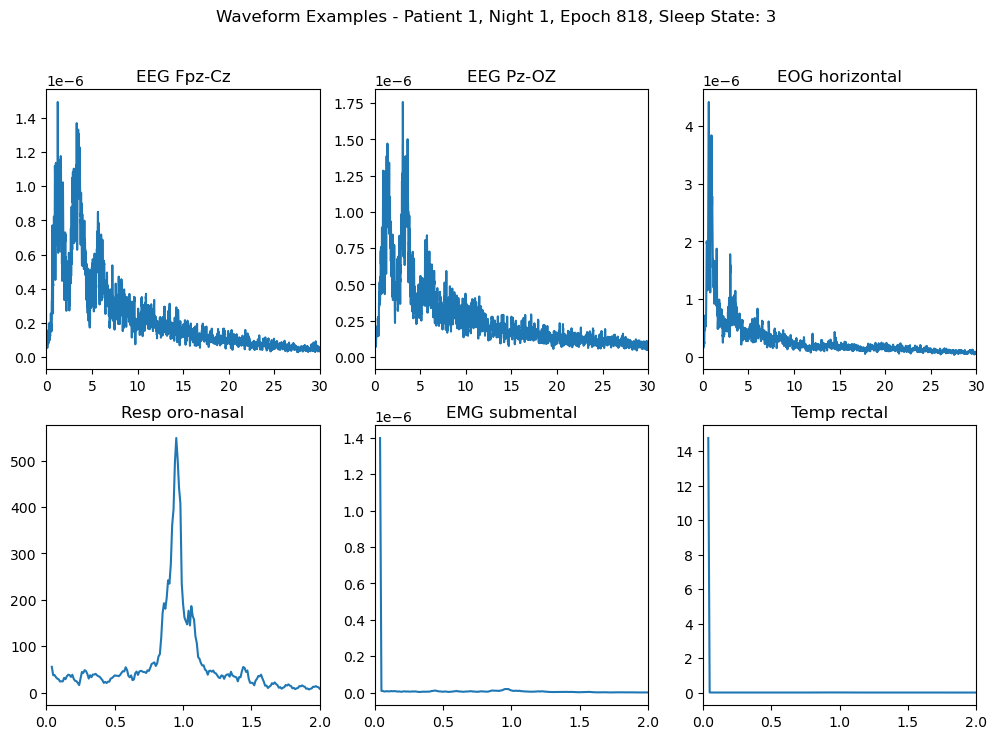

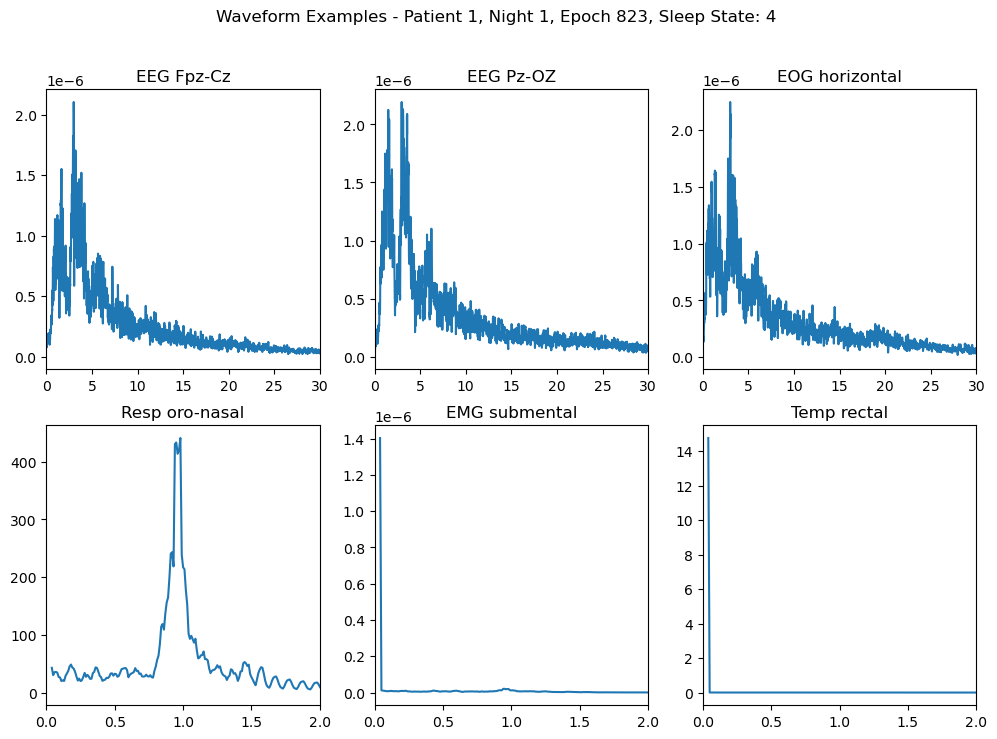

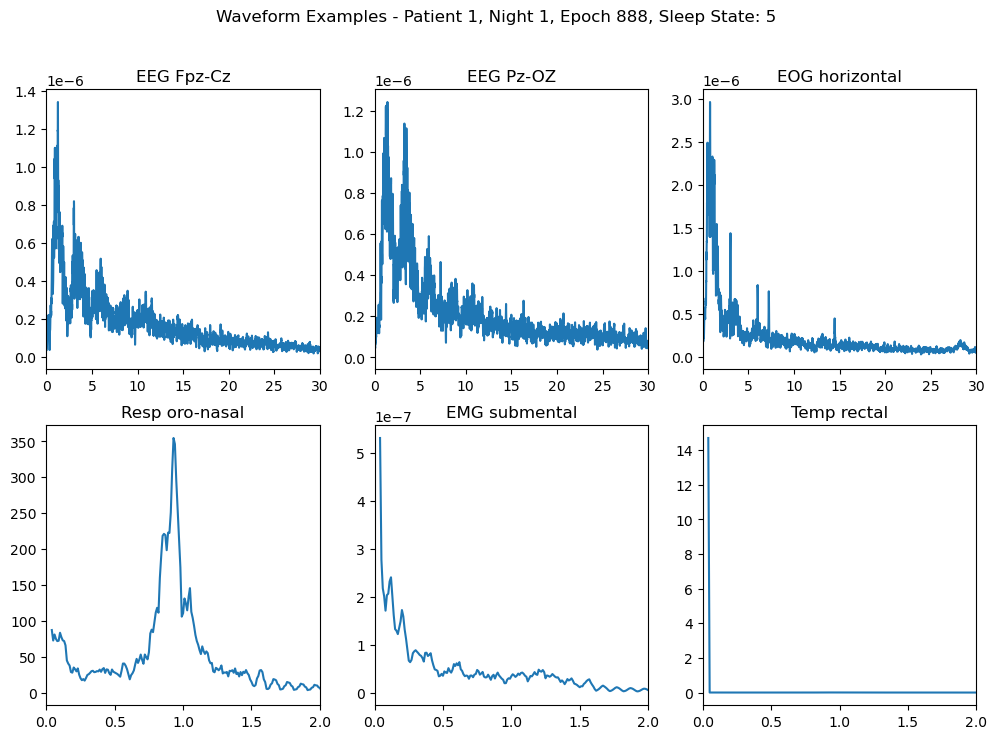

In [120]:
data = load_data(files[6])
data.shape
labels = np.load(f"Data/{files[7]}")

representatives = [np.min(np.arange(len(labels))[labels==i]) for i in range(1,7)]
#print(representatives)

representatives[0] = 20

for i in range(0,len(representatives)):
    plot_waves_fft(data,representatives[i],10,labels)
    plt.suptitle(f"Waveform Examples - Patient 1, Night 1, Epoch {representatives[i]}, Sleep State: {i}")

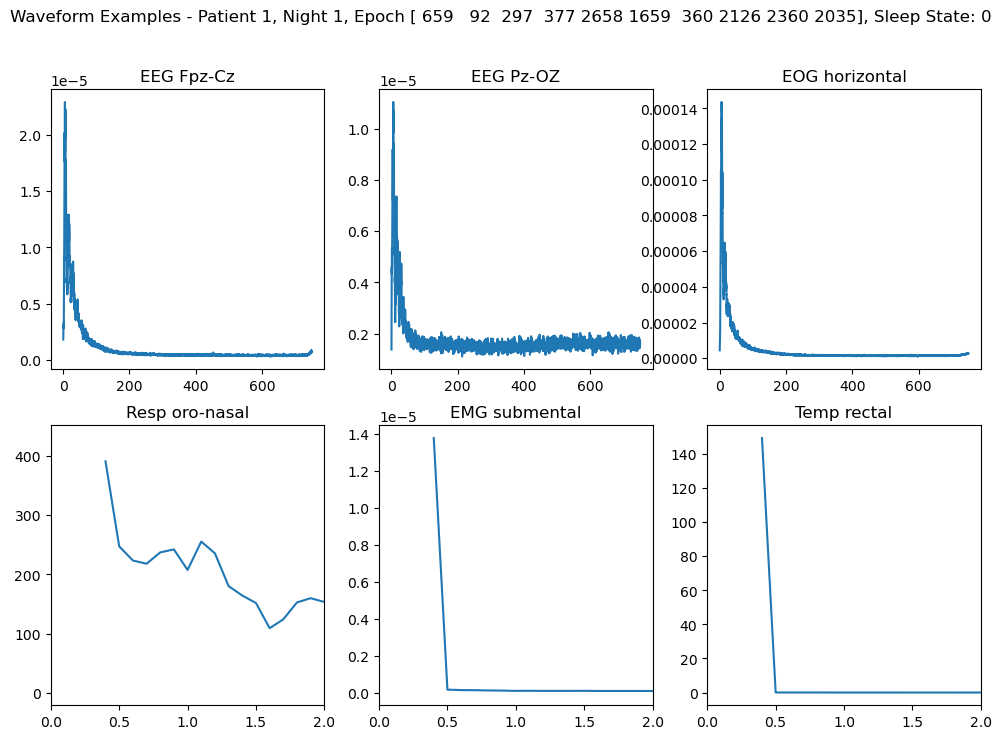

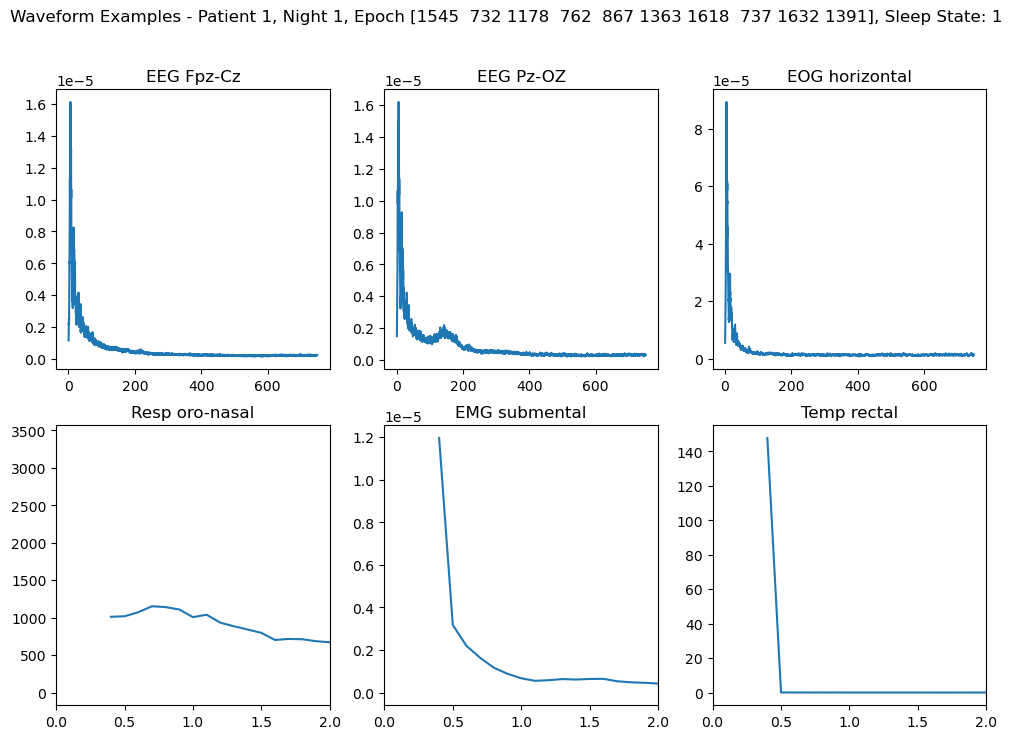

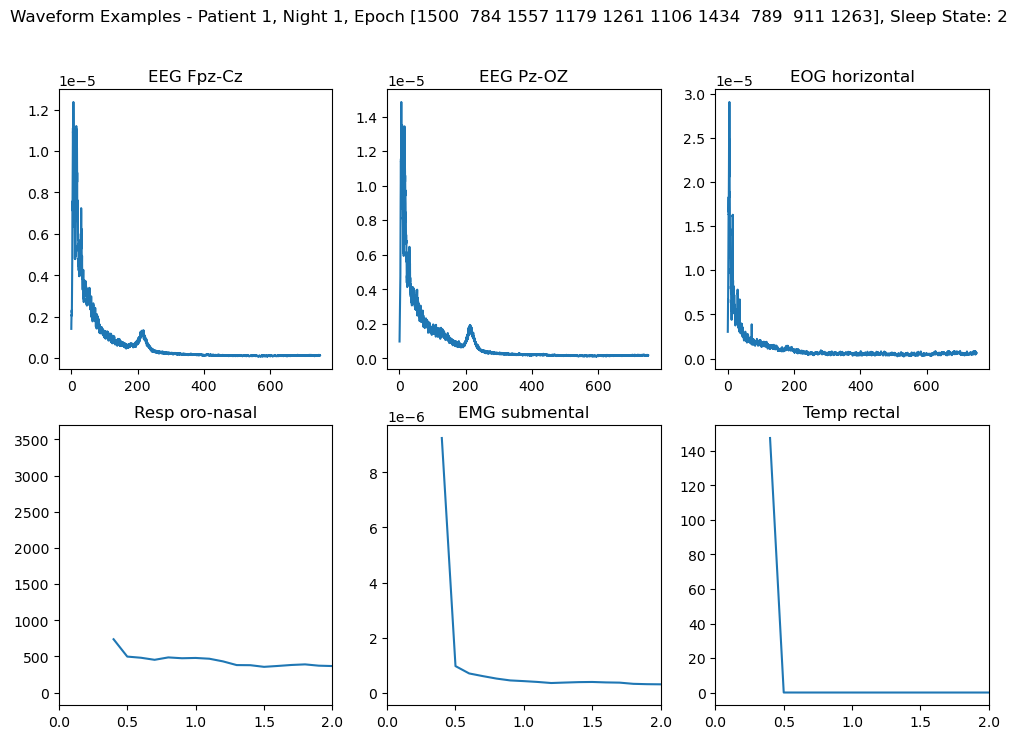

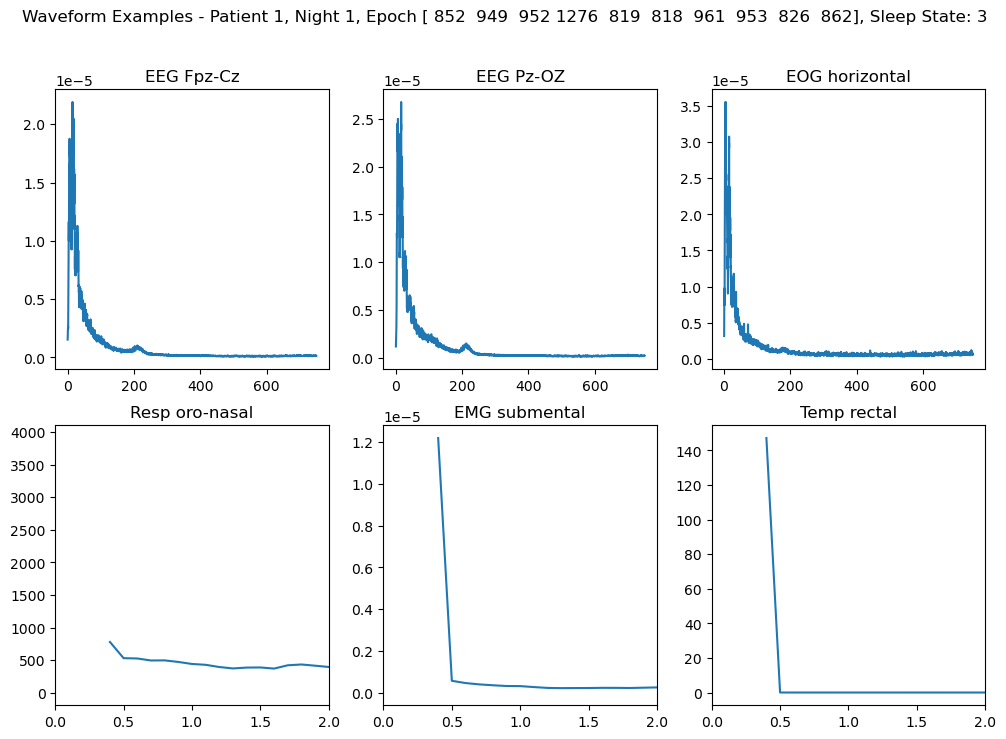

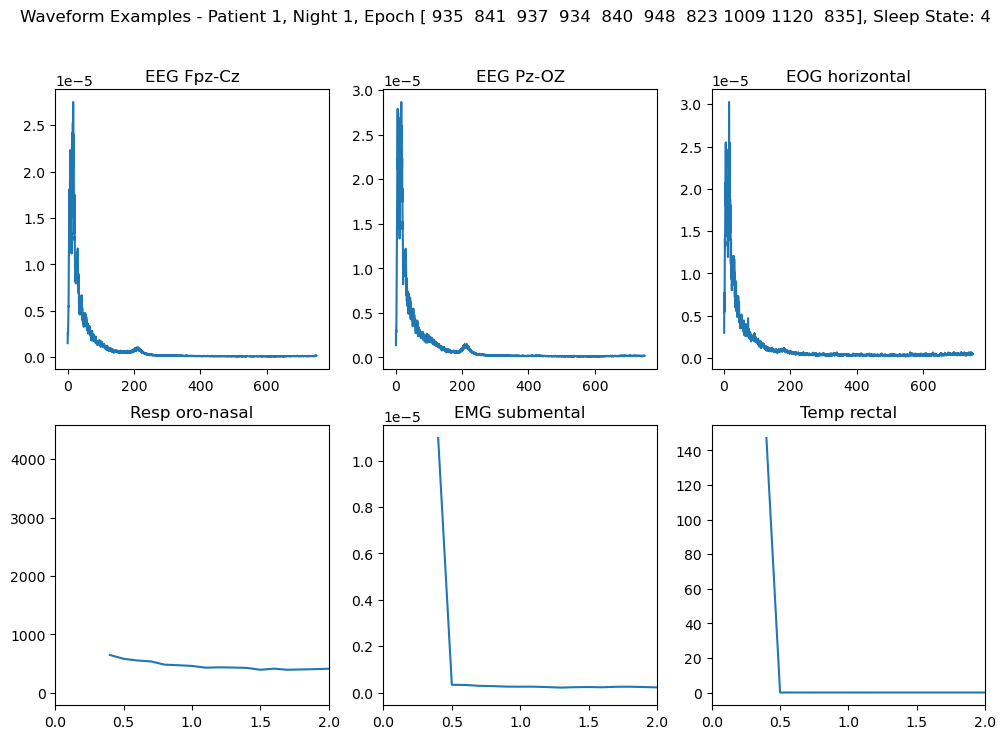

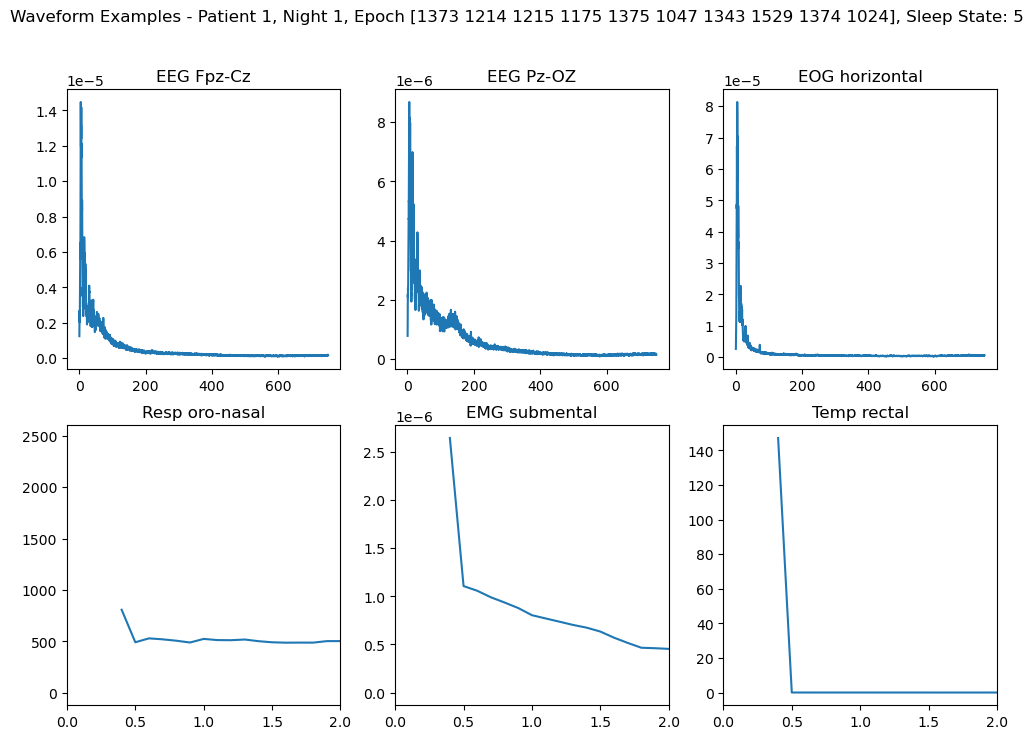

In [122]:

def plot_waves_fft_avg(data,epochs,backward):
    fig, ax = plt.subplots(2,3)
    ax = ax.flatten()
    fig.set_size_inches(12,8)

    # get ffts
    for i in range(0,6):
        ax[i].set_title(channel_labels_strings[i])

        x = np.zeros(7500)
        y = np.zeros(7500)
        for j in range(0,len(epochs)):
            subset = data[:,(epochs[j]-backward):epochs[j],:]
            a, b = get_fft(subset[i,:,:])
            x = x + a
            y = y + b
        
        sns.lineplot(x=x,y=y,ax=ax[i])

        if(i>2):
            ax[i].set_xlim(0,2)

def plot_averages_fft(data):
    representatives = [np.random.choice(np.arange(len(labels))[labels==i],size=10) for i in range(1,7)]
    #print(representatives)

    for i in range(0,len(representatives)):
        # get average fft

        plot_waves_fft_avg(data,representatives[i],5)
        plt.suptitle(f"Waveform Examples - Patient 1, Night 1, Epoch {representatives[i]}, Sleep State: {i}")

plot_averages_fft(data)


In [76]:
predicted = np.load("predictions.npy")
predicted.shape

(2853,)

In [95]:
np.arange(6)[labels[0][30].astype(np.bool_)]

array([2])

In [96]:
#sns.lineplot(predicted)
labels = np.load("TEST_sequential_data_output.npy",allow_pickle=True)

labels[0]

output = np.zeros(1012)
for i in range(0,1012):
    output[i] = np.arange(6)[labels[0][i].astype(np.bool_)]

<Axes: >

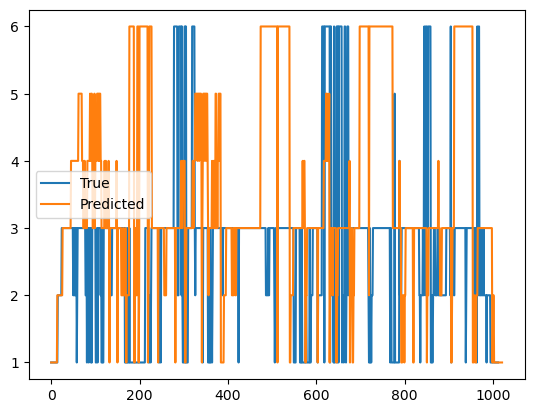

In [115]:
sns.lineplot(predicted[0:1012],label="True")
sns.lineplot(output+1,label="Predicted")

In [103]:
labels[1].shape

(1021, 6)

<Axes: >

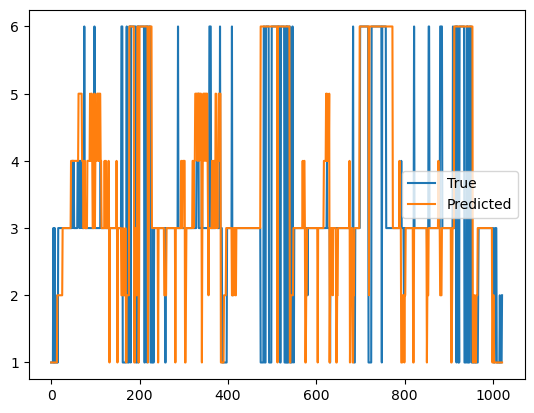

In [114]:

output = np.zeros(1021)
for i in range(0,1021):
    output[i] = np.arange(6)[labels[1][i].astype(np.bool_)]

sns.lineplot(predicted[1012:(1012+1021)],label="True")
sns.lineplot(output+1,label="Predicted")

In [110]:
labels[2].shape

(820, 6)

<Axes: >

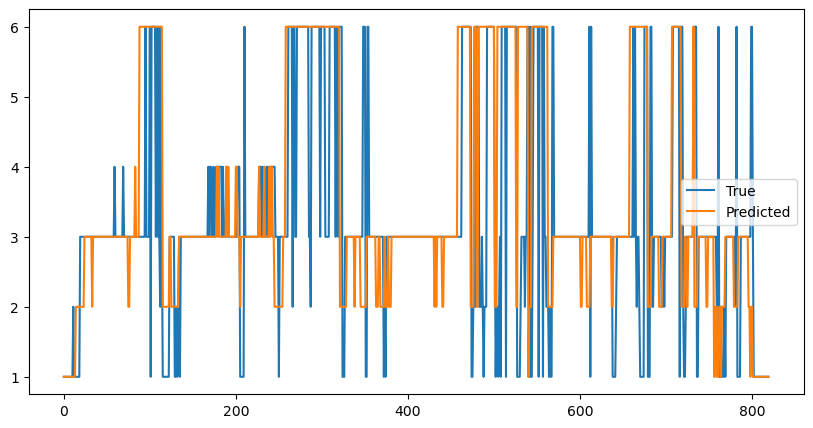

In [116]:

output = np.zeros(820)
for i in range(0,820):
    output[i] = np.arange(6)[labels[2][i].astype(np.bool_)]

plt.figure(figsize=(10,5))
sns.lineplot(predicted[(1012+1021):(1012+1021+820)],label="True")
sns.lineplot(output+1,label="Predicted")

In [117]:
data = pd.DataFrame({"predicted":output+1,"true":predicted[(1012+1021):(1012+1021+820)]})

In [118]:
data.corr()

,predicted,true
predicted,1.000000,0.509697
true,0.509697,1.000000
